In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the dataset
data = pd.read_csv('Food_Delivery_Times.csv')

# Display the first few rows of the dataset
print(data.head())

   Order_ID  Distance_km Weather Traffic_Level Time_of_Day Vehicle_Type  \
0       522         7.93   Windy           Low   Afternoon      Scooter   
1       738        16.42   Clear        Medium     Evening         Bike   
2       741         9.52   Foggy           Low       Night      Scooter   
3       661         7.44   Rainy        Medium   Afternoon      Scooter   
4       412        19.03   Clear           Low     Morning         Bike   

   Preparation_Time_min  Courier_Experience_yrs  Delivery_Time_min  
0                    12                     1.0                 43  
1                    20                     2.0                 84  
2                    28                     1.0                 59  
3                     5                     1.0                 37  
4                    16                     5.0                 68  


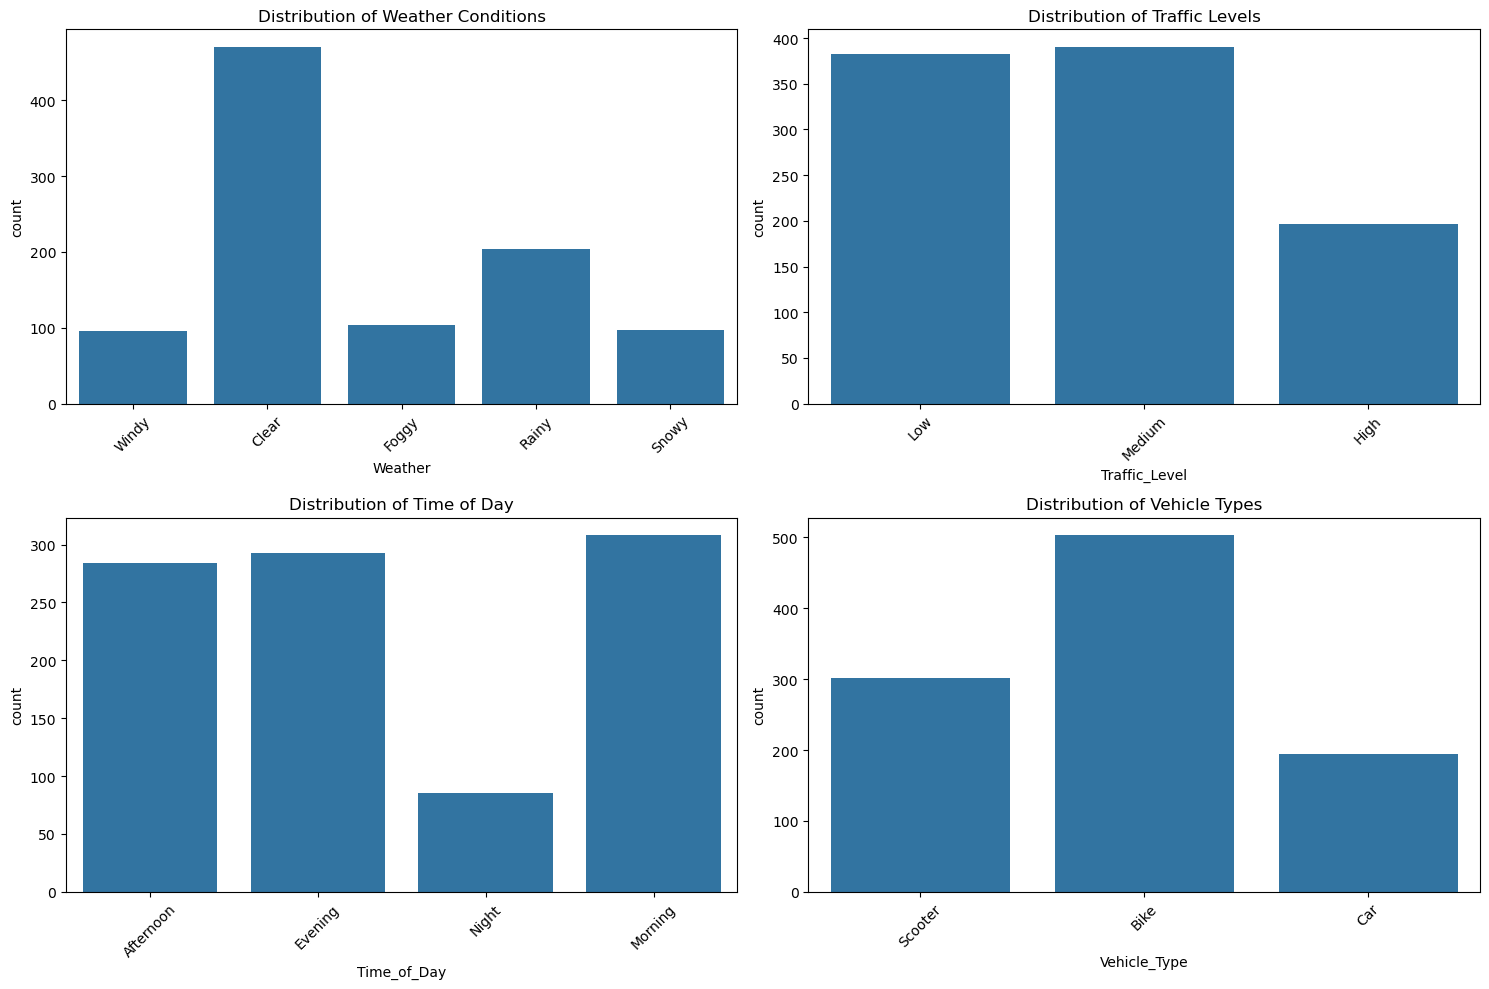

In [3]:
# Create a figure of counts for each categorical variable
plt.figure(figsize=(15, 10))

# Plot Weather
plt.subplot(2, 2, 1)
sns.countplot(data=data, x='Weather')
plt.title('Distribution of Weather Conditions')
plt.xticks(rotation=45)

# Plot Traffic Level
plt.subplot(2, 2, 2)
sns.countplot(data=data, x='Traffic_Level')
plt.title('Distribution of Traffic Levels')
plt.xticks(rotation=45)

# Plot Time of Day
plt.subplot(2, 2, 3)
sns.countplot(data=data, x='Time_of_Day')
plt.title('Distribution of Time of Day')
plt.xticks(rotation=45)

# Plot Vehicle Type
plt.subplot(2, 2, 4)
sns.countplot(data=data, x='Vehicle_Type')
plt.title('Distribution of Vehicle Types')
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


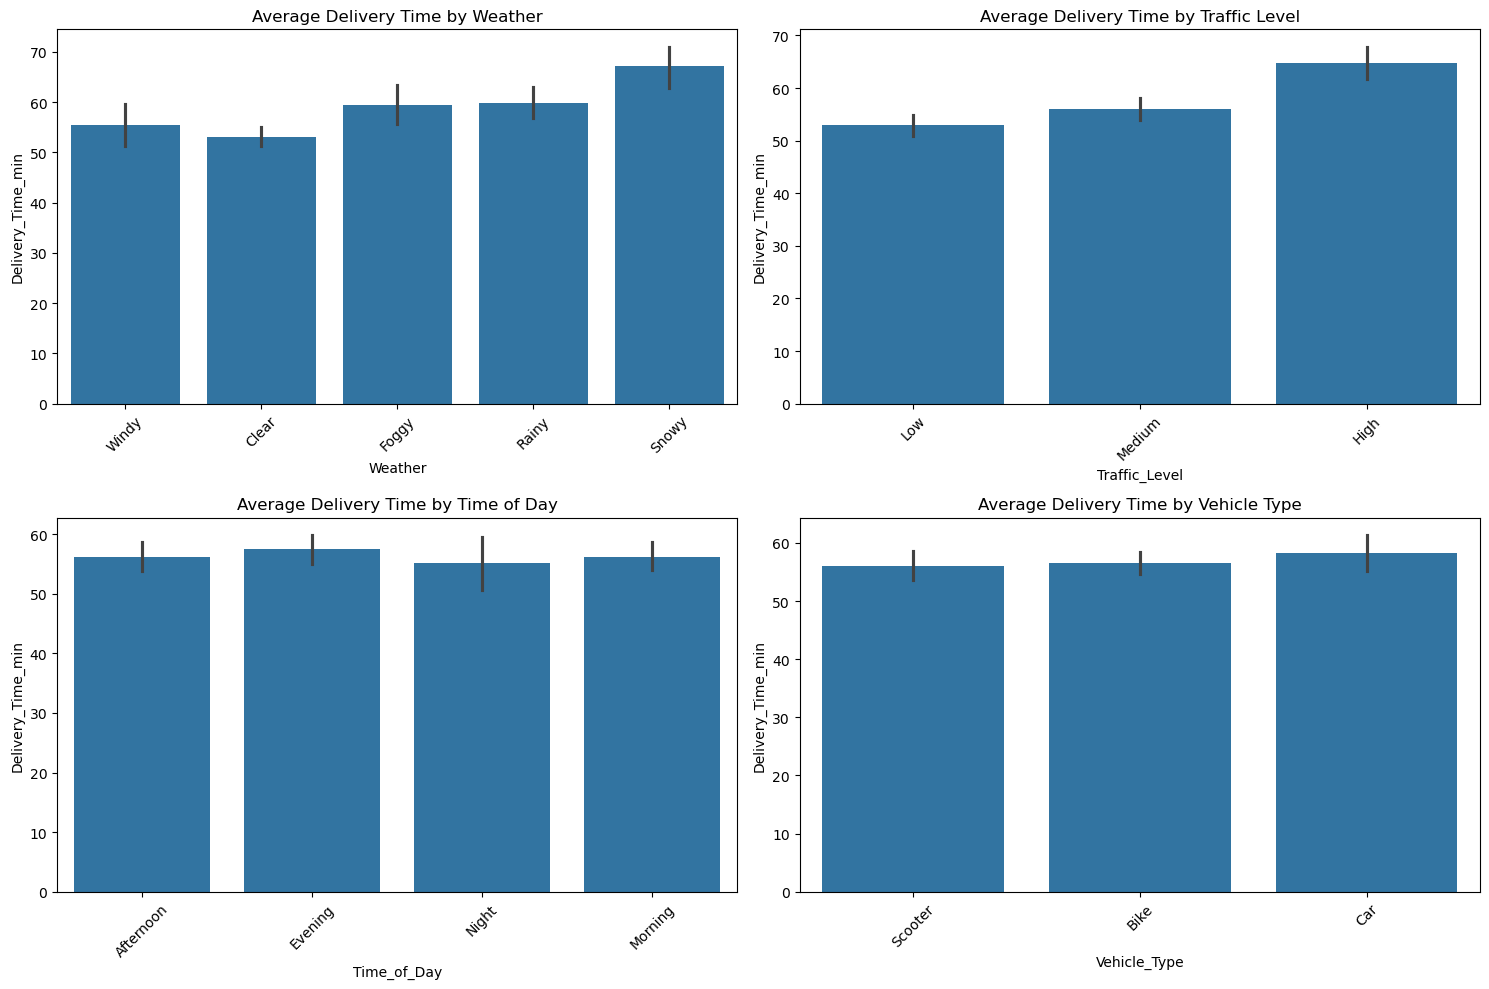

In [4]:
# Create a figure with subplots for categorical variables vs delivery time
plt.figure(figsize=(15, 10))

# Plot Weather vs Delivery Time
plt.subplot(2, 2, 1)
sns.barplot(data=data, x='Weather', y='Delivery_Time_min')
plt.title('Average Delivery Time by Weather')
plt.xticks(rotation=45)

# Plot Traffic Level vs Delivery Time 
plt.subplot(2, 2, 2)
sns.barplot(data=data, x='Traffic_Level', y='Delivery_Time_min')
plt.title('Average Delivery Time by Traffic Level')
plt.xticks(rotation=45)

# Plot Time of Day vs Delivery Time
plt.subplot(2, 2, 3)
sns.barplot(data=data, x='Time_of_Day', y='Delivery_Time_min')
plt.title('Average Delivery Time by Time of Day')
plt.xticks(rotation=45)

# Plot Vehicle Type vs Delivery Time
plt.subplot(2, 2, 4)
sns.barplot(data=data, x='Vehicle_Type', y='Delivery_Time_min')
plt.title('Average Delivery Time by Vehicle Type')
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


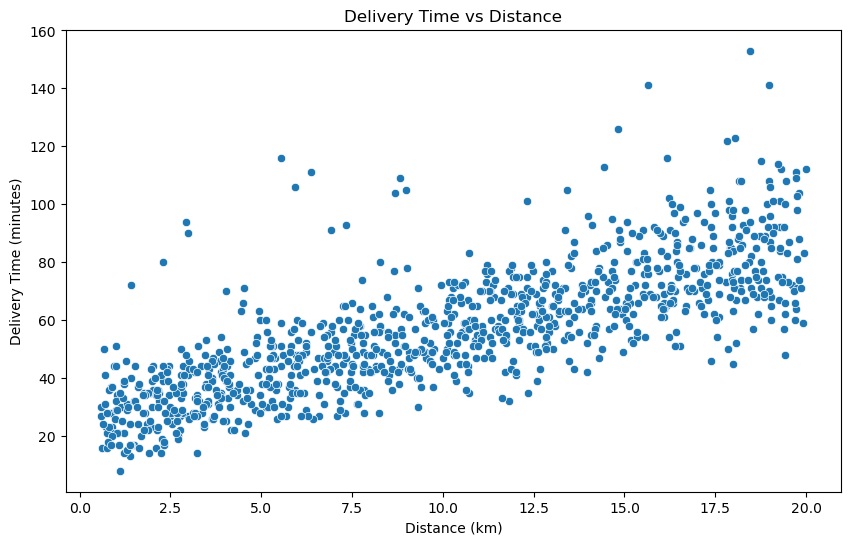

In [5]:
# Create scatter plot of Distance vs Delivery Time
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Distance_km', y='Delivery_Time_min')
plt.title('Delivery Time vs Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Delivery Time (minutes)')
plt.show()

# Broadly speaking, the delivery time increases with the distance
# A positive correlation





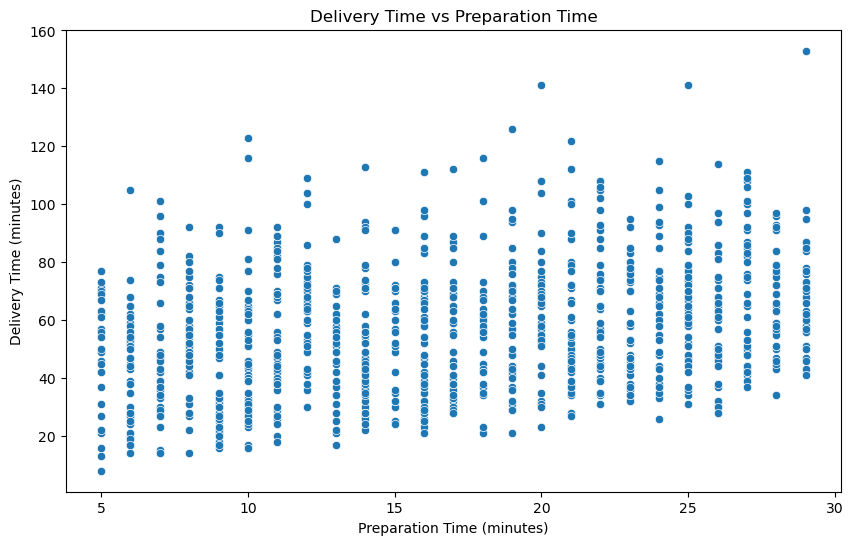

In [6]:
# Create scatter plot of Preparation Time vs Delivery Time
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Preparation_Time_min', y='Delivery_Time_min')
plt.title('Delivery Time vs Preparation Time')
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Delivery Time (minutes)')
plt.show()
# A weak positive correlation


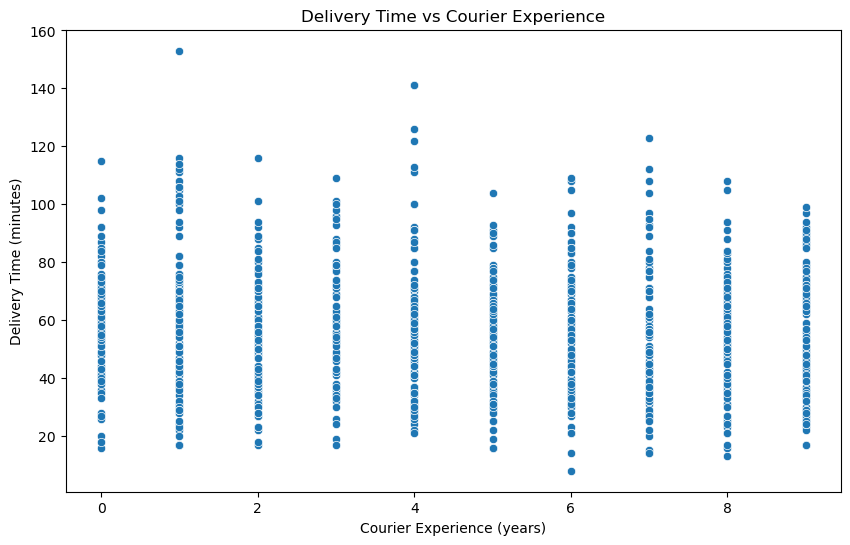

In [7]:
# Create scatter plot of Courier Experience vs Delivery Time
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Courier_Experience_yrs', y='Delivery_Time_min')
plt.title('Delivery Time vs Courier Experience')
plt.xlabel('Courier Experience (years)')
plt.ylabel('Delivery Time (minutes)')
plt.show()

# There is no particular correlation between the courier experience and the delivery time


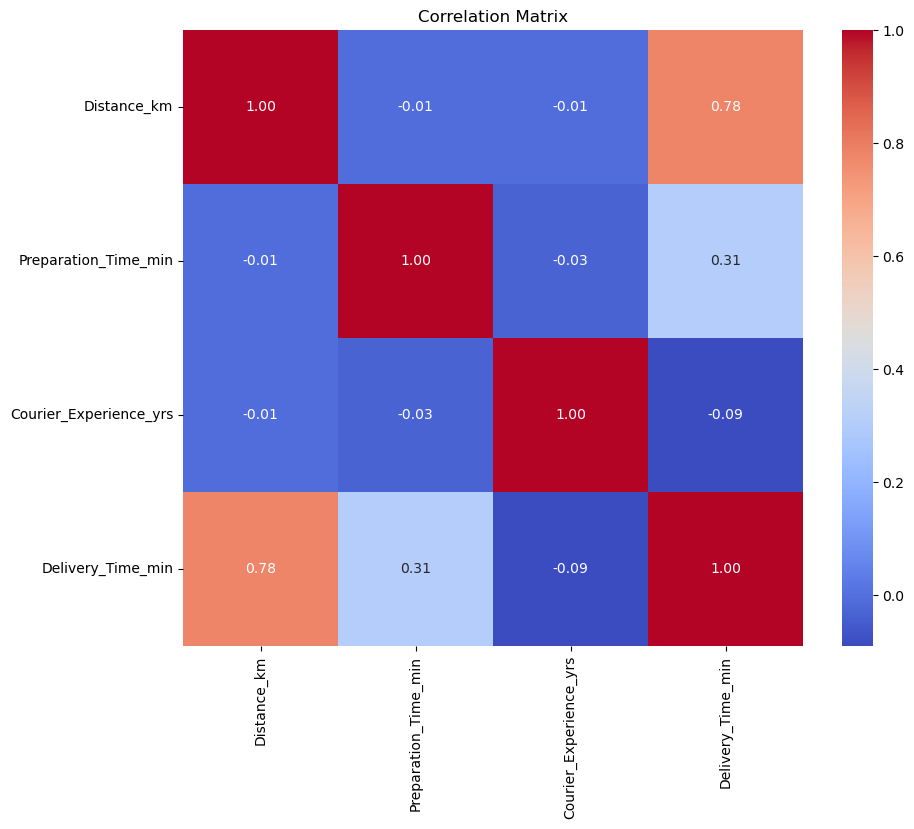

Distance_km               0.780998
Preparation_Time_min      0.307350
Courier_Experience_yrs   -0.090433
Delivery_Time_min         1.000000
Name: Delivery_Time_min, dtype: float64


In [8]:
# Create a correlation matrix
correlation_matrix = data[['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']].corr()


# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix['Delivery_Time_min'])
# Observe the last row of the correlation matrix

# The correlation between the distance and the delivery time is 0.78, which is a kinda strong positive correlation
# The correlation between the preparation time and the delivery time is 0.31, which is a weak positive correlation
# The correlation between the courier experience and the delivery time is -0.09, basically no correlation


In [9]:
# Perform one-hot encoding for categorical columns
data_encoded = pd.get_dummies(data, columns=['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type'])

# Display the first few rows of the encoded dataset
print(data_encoded.head())

   Order_ID  Distance_km  Preparation_Time_min  Courier_Experience_yrs  \
0       522         7.93                    12                     1.0   
1       738        16.42                    20                     2.0   
2       741         9.52                    28                     1.0   
3       661         7.44                     5                     1.0   
4       412        19.03                    16                     5.0   

   Delivery_Time_min  Weather_Clear  Weather_Foggy  Weather_Rainy  \
0                 43          False          False          False   
1                 84           True          False          False   
2                 59          False           True          False   
3                 37          False          False           True   
4                 68           True          False          False   

   Weather_Snowy  Weather_Windy  Traffic_Level_High  Traffic_Level_Low  \
0          False           True               False               

In [10]:
# Fill in missing values with previous values
data_encoded.fillna(method='ffill', inplace=True)

# Verify that there are no missing values left
print(data_encoded.isnull().sum())
data = data_encoded # set it to data

Order_ID                  0
Distance_km               0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
Weather_Clear             0
Weather_Foggy             0
Weather_Rainy             0
Weather_Snowy             0
Weather_Windy             0
Traffic_Level_High        0
Traffic_Level_Low         0
Traffic_Level_Medium      0
Time_of_Day_Afternoon     0
Time_of_Day_Evening       0
Time_of_Day_Morning       0
Time_of_Day_Night         0
Vehicle_Type_Bike         0
Vehicle_Type_Car          0
Vehicle_Type_Scooter      0
dtype: int64


/tmp/ipykernel_279796/479008226.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_encoded.fillna(method='ffill', inplace=True)


In [11]:
# Replace True/False with 1/0
data_encoded = data_encoded.astype(int)
print(data.head())

   Order_ID  Distance_km  Preparation_Time_min  Courier_Experience_yrs  \
0       522         7.93                    12                     1.0   
1       738        16.42                    20                     2.0   
2       741         9.52                    28                     1.0   
3       661         7.44                     5                     1.0   
4       412        19.03                    16                     5.0   

   Delivery_Time_min  Weather_Clear  Weather_Foggy  Weather_Rainy  \
0                 43          False          False          False   
1                 84           True          False          False   
2                 59          False           True          False   
3                 37          False          False           True   
4                 68           True          False          False   

   Weather_Snowy  Weather_Windy  Traffic_Level_High  Traffic_Level_Low  \
0          False           True               False               

In [12]:
# Columns to normalize
columns_to_normalize = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the specified columns
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Display the first few rows of the normalized dataset
print(data.head())

   Order_ID  Distance_km  Preparation_Time_min  Courier_Experience_yrs  \
0       522    -0.374085             -0.691853               -1.226830   
1       738     1.117008              0.419111               -0.883757   
2       741    -0.094835              1.530076               -1.226830   
3       661    -0.460144             -1.663947               -1.226830   
4       412     1.575401             -0.136371                0.145463   

   Delivery_Time_min  Weather_Clear  Weather_Foggy  Weather_Rainy  \
0                 43          False          False          False   
1                 84           True          False          False   
2                 59          False           True          False   
3                 37          False          False           True   
4                 68           True          False          False   

   Weather_Snowy  Weather_Windy  Traffic_Level_High  Traffic_Level_Low  \
0          False           True               False               

In [13]:
# Prepare features (X) and target (y)
X = data.drop(columns=['Order_ID', 'Delivery_Time_min']).values
y = data['Delivery_Time_min'].values

# First split: 70% train, 30% remaining
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Second split: Split the remaining 30% into equal parts for validation and test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes to verify split ratios
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)  
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (700, 18) (700,)
Validation set shape: (150, 18) (150,)
Test set shape: (150, 18) (150,)


# Batch Gradient Descent


In [14]:
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r2_score_manual(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

def batch_gradient_descent(X_train, y_train, X_val, y_val, init_type='zero', 
                         learning_rate=0.05, epochs=1000):
    
    # Initialize weights and bias
    if init_type == 'zero':
        weights = np.zeros(X_train.shape[1])
        bias = 0
    else:  # random initialization
        weights = np.random.randn(X_train.shape[1])
        bias = np.random.randn()

    foo = lambda x : lambda y : x.dot(y)+bias # a cute helping function
    
    # History tracking
    train_loss_history = []
    val_loss_history = []
    n = len(y_train)
    
    for epoch in range(epochs):
        # Forward pass
        #y_pred = np.dot(X_train, weights) + bias
        y_pred  = np.array(list(map(foo(weights),X_train)))
        #print(y_pred)
        # Calculate gradients
        dw = -(2/n) * np.dot(X_train.T, (y_train - y_pred))
        db = -(2/n) * np.sum(y_train - y_pred)
        #print(f"weights: {type(weights)}, learning_rate: {type(learning_rate)}, dw: {type(dw)}, bias: {type(bias)}, db: {type(db)}")
        # Update parameters
        weights = weights - learning_rate * dw # WHY += NOT WORK ?????
        bias = bias - learning_rate * db
        
        # Record training loss
        train_loss = mse_loss(y_train, y_pred)
        train_loss_history.append(train_loss)
        
        # Calculate validation loss every 10 epochs
        if epoch % 10 == 0:
            val_pred = np.dot(X_val, weights) + bias
            val_loss = mse_loss(y_val, val_pred)
            val_loss_history.append(val_loss)
            
        if epoch % 50 == 0:
            print(f'Epoch {epoch}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
    
    return weights, bias, train_loss_history, val_loss_history


Epoch 0, Train Loss: 3631.9434, Val Loss: 3033.0529
Epoch 50, Train Loss: 176.6568, Val Loss: 184.0166
Epoch 100, Train Loss: 146.0742, Val Loss: 141.5928
Epoch 150, Train Loss: 135.9626, Val Loss: 127.0062
Epoch 200, Train Loss: 131.6842, Val Loss: 120.2924
Epoch 250, Train Loss: 129.6549, Val Loss: 116.7848
Epoch 300, Train Loss: 128.5751, Val Loss: 114.7609
Epoch 350, Train Loss: 127.9282, Val Loss: 113.4843
Epoch 400, Train Loss: 127.4930, Val Loss: 112.6111
Epoch 450, Train Loss: 127.1681, Val Loss: 111.9697
Epoch 500, Train Loss: 126.9038, Val Loss: 111.4692
Epoch 550, Train Loss: 126.6749, Val Loss: 111.0589
Epoch 600, Train Loss: 126.4678, Val Loss: 110.7094
Epoch 650, Train Loss: 126.2748, Val Loss: 110.4024
Epoch 700, Train Loss: 126.0917, Val Loss: 110.1265
Epoch 750, Train Loss: 125.9160, Val Loss: 109.8741
Epoch 800, Train Loss: 125.7460, Val Loss: 109.6398
Epoch 850, Train Loss: 125.5808, Val Loss: 109.4200
Epoch 900, Train Loss: 125.4198, Val Loss: 109.2121
Epoch 950, Tr

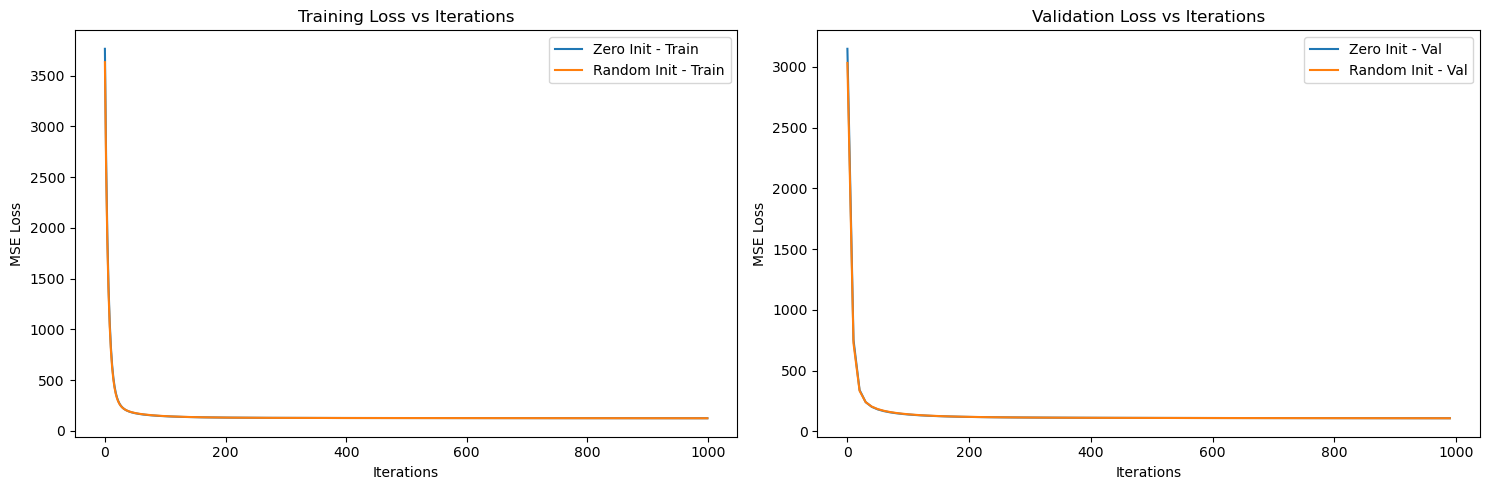


Zero Initialization Test Metrics:
MSE: 66.6767
R2 Score: 0.8394

Random Initialization Test Metrics:
MSE: 66.4981
R2 Score: 0.8398


In [15]:

# Train models with different initializations

weights_random, bias_random, history_random_train, history_random_val = batch_gradient_descent(
    X_train, y_train, X_val, y_val, init_type='random', learning_rate=  0.02, epochs=1000
)

weights_zero, bias_zero, history_zero_train, history_zero_val = batch_gradient_descent(
    X_train, y_train, X_val, y_val, init_type='zero', learning_rate=  0.02, epochs=1000
)

# Plot training curves
plt.figure(figsize=(15, 5))

# Training loss plot
plt.subplot(1, 2, 1)
plt.plot(history_zero_train, label='Zero Init - Train')
plt.plot(history_random_train, label='Random Init - Train')
plt.xlabel('Iterations')
plt.ylabel('MSE Loss')
plt.title('Training Loss vs Iterations')
plt.legend()

# Validation loss plot
plt.subplot(1, 2, 2)
plt.plot(range(0, len(history_zero_train), 10), history_zero_val, label='Zero Init - Val')
plt.plot(range(0, len(history_random_train), 10), history_random_val, label='Random Init - Val')
plt.xlabel('Iterations')
plt.ylabel('MSE Loss')
plt.title('Validation Loss vs Iterations')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate and compare test metrics
def evaluate_model(weights, bias, X_test, y_test):
    y_pred = np.dot(X_test, weights) + bias
    mse = mse_loss(y_test, y_pred)
    r2 = r2_score_manual(y_test, y_pred)
    return mse, r2

# Test metrics for zero initialization
mse_zero, r2_zero = evaluate_model(weights_zero, bias_zero, X_test, y_test)
print("\nZero Initialization Test Metrics:")
print(f"MSE: {mse_zero:.4f}")
print(f"R2 Score: {r2_zero:.4f}")

# Test metrics for random initialization  
mse_random, r2_random = evaluate_model(weights_random, bias_random, X_test, y_test)
print("\nRandom Initialization Test Metrics:")
print(f"MSE: {mse_random:.4f}") 
print(f"R2 Score: {r2_random:.4f}")




# Mini Batch Gradient Descent
I will be going with zero initialised weights going forward

In [16]:
def create_mini_batches(X, y, batch_size):
    """Create mini-batches from training data"""
    mini_batches = []
    data = np.hstack((X, y.reshape(-1,1)))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    
    for i in range(n_minibatches):
        mini_batch = data[i * batch_size:(i + 1) * batch_size, :]
        X_mini = mini_batch[:, :-1]
        y_mini = mini_batch[:, -1]
        mini_batches.append((X_mini, y_mini))
    
    if data.shape[0] % batch_size != 0:
        mini_batch = data[n_minibatches * batch_size:, :]
        X_mini = mini_batch[:, :-1]
        y_mini = mini_batch[:, -1]
        mini_batches.append((X_mini, y_mini))
    
    return mini_batches

def mini_batch_gradient_descent(X_train, y_train, X_val, y_val, batch_size=32,
                              init_type='zero', learning_rate=0.05, epochs=1000):
    # Initialize weights and bias
    if init_type == 'zero':
        weights = np.zeros(X_train.shape[1])
        bias = 0
    else:
        weights = np.random.randn(X_train.shape[1]) * 0.01
        bias = np.random.randn() * 0.01
    
    # History tracking
    train_loss_history = []
    val_loss_history = []
    
    for epoch in range(epochs):
        mini_batches = create_mini_batches(X_train, y_train, batch_size)
        epoch_loss = 0
        
        for X_mini, y_mini in mini_batches:
            # Forward pass
            y_pred = np.dot(X_mini, weights) + bias
            
            # Calculate gradients
            n = len(y_mini)
            dw = -(2/n) * np.dot(X_mini.T, (y_mini - y_pred))
            db = -(2/n) * np.sum(y_mini - y_pred)
            
            # Update parameters
            weights = weights - learning_rate * dw
            bias = bias - learning_rate * db
            
            # Calculate batch loss
            batch_loss = mse_loss(y_mini, y_pred)
            epoch_loss += batch_loss
            
        # Average loss over all batches
        epoch_loss /= len(mini_batches)
        train_loss_history.append(epoch_loss)
        
        # Validation loss
        if epoch % 10 == 0:
            val_pred = np.dot(X_val, weights) + bias
            val_loss = mse_loss(y_val, val_pred)
            val_loss_history.append(val_loss)
            print(f'Epoch {epoch}, Train Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}')
    
    return weights, bias, train_loss_history, val_loss_history


Epoch 0, Train Loss: 1187.9982, Val Loss: 319.5083
Epoch 10, Train Loss: 132.3889, Val Loss: 116.8468
Epoch 20, Train Loss: 128.1303, Val Loss: 111.7612
Epoch 30, Train Loss: 127.4466, Val Loss: 110.1728
Epoch 40, Train Loss: 127.0347, Val Loss: 108.9354
Epoch 50, Train Loss: 127.5032, Val Loss: 108.0907
Epoch 60, Train Loss: 125.1028, Val Loss: 107.6494
Epoch 70, Train Loss: 124.1642, Val Loss: 107.1088
Epoch 80, Train Loss: 124.5276, Val Loss: 106.3023
Epoch 90, Train Loss: 123.6403, Val Loss: 106.0077
Epoch 100, Train Loss: 122.9068, Val Loss: 105.3819
Epoch 110, Train Loss: 122.5976, Val Loss: 104.9575
Epoch 120, Train Loss: 122.4464, Val Loss: 104.8988
Epoch 130, Train Loss: 123.8100, Val Loss: 104.1813
Epoch 140, Train Loss: 122.1816, Val Loss: 103.8342
Epoch 150, Train Loss: 121.3086, Val Loss: 103.8230
Epoch 160, Train Loss: 120.8419, Val Loss: 103.3847
Epoch 170, Train Loss: 121.8017, Val Loss: 103.3772
Epoch 180, Train Loss: 121.3490, Val Loss: 103.0678
Epoch 190, Train Loss:

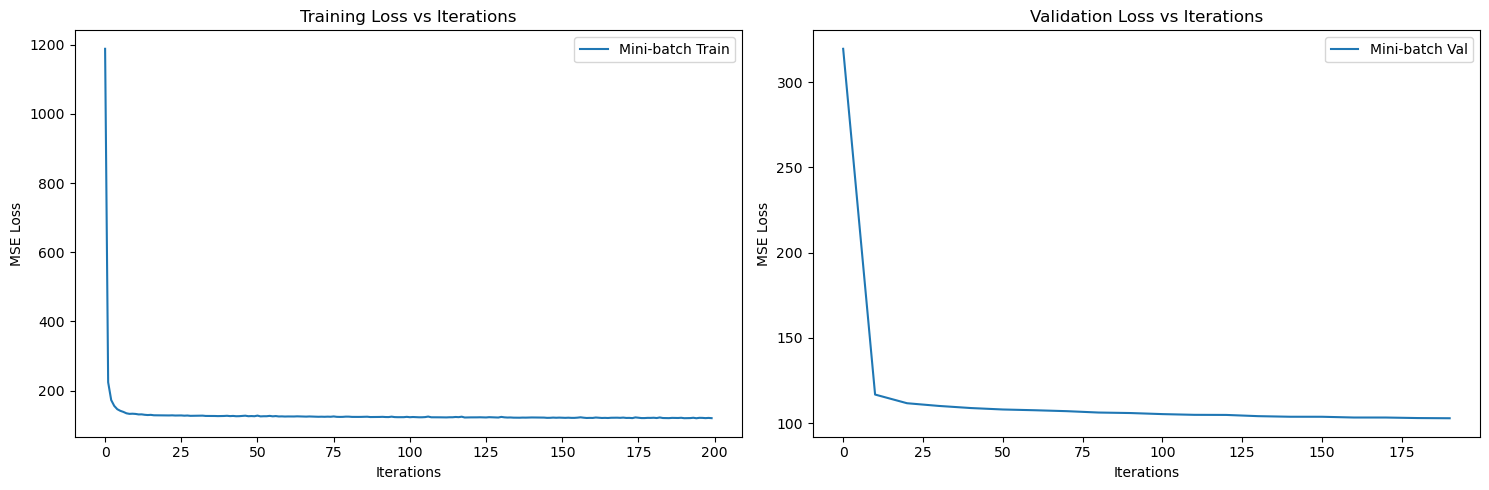


Mini-batch GD Test Metrics:
MSE: 64.6181
R2 Score: 0.8444


In [17]:

# Train and evaluate
weights_mini, bias_mini, history_mini_train, history_mini_val = mini_batch_gradient_descent(
    X_train, y_train, X_val, y_val,
    batch_size=32,
    learning_rate=0.02,
    epochs=200
)

# Plot results
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_mini_train, label='Mini-batch Train')
plt.xlabel('Iterations')
plt.ylabel('MSE Loss')
plt.title('Training Loss vs Iterations')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(0, len(history_mini_train), 10), history_mini_val, label='Mini-batch Val')
plt.xlabel('Iterations')
plt.ylabel('MSE Loss')
plt.title('Validation Loss vs Iterations')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate on test set
mse_mini, r2_mini = evaluate_model(weights_mini, bias_mini, X_test, y_test)
print("\nMini-batch GD Test Metrics:")
print(f"MSE: {mse_mini:.4f}")
print(f"R2 Score: {r2_mini:.4f}")

# Stochastic Gradient Descent

In [18]:
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r2_score_manual(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

def stochastic_gradient_descent(X_train, y_train, X_val, y_val, init_type='zero', learning_rate=0.05, epochs=1000):
    # Initialize weights and bias
    if init_type == 'zero':
        weights = np.zeros(X_train.shape[1])
        bias = 0
    else:  # random initialization
        weights = np.random.randn(X_train.shape[1])
        bias = np.random.randn()

    # History tracking
    train_loss_history = []
    val_loss_history = []

    for epoch in range(epochs):
        for i in range(len(y_train)):
            # Select one data point
            xi = X_train[i, :].reshape(1, -1)
            yi = y_train[i]

            # Forward pass
            y_pred = np.dot(xi, weights) + bias

            # Calculate gradients
            dw = -2 * np.dot(xi.T, (yi - y_pred))
            db = -2 * (yi - y_pred)

            # Update parameters
            weights = weights - learning_rate * dw
            bias = bias - learning_rate * db

        # Record training loss
        y_train_pred = np.dot(X_train, weights) + bias
        train_loss = mse_loss(y_train, y_train_pred)
        train_loss_history.append(train_loss)

        # Calculate validation loss every 10 epochs
        if epoch % 10 == 0:
            y_val_pred = np.dot(X_val, weights) + bias
            val_loss = mse_loss(y_val, y_val_pred)
            val_loss_history.append(val_loss)

        if epoch % 50 == 0:
            print(f'Epoch {epoch}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    return weights, bias, train_loss_history, val_loss_history


Epoch 0, Train Loss: 1284.1116, Val Loss: 1301.7312
Epoch 50, Train Loss: 127.9699, Val Loss: 113.3841
Epoch 100, Train Loss: 126.1996, Val Loss: 110.1900
Epoch 150, Train Loss: 125.0441, Val Loss: 108.6933
Epoch 200, Train Loss: 124.0544, Val Loss: 107.5393
Epoch 250, Train Loss: 123.1971, Val Loss: 106.5698
Epoch 300, Train Loss: 122.4538, Val Loss: 105.7403
Epoch 350, Train Loss: 121.8087, Val Loss: 105.0273
Epoch 400, Train Loss: 121.2486, Val Loss: 104.4137
Epoch 450, Train Loss: 120.7619, Val Loss: 103.8853
Epoch 500, Train Loss: 120.3389, Val Loss: 103.4302
Epoch 550, Train Loss: 119.9709, Val Loss: 103.0381
Epoch 600, Train Loss: 119.6507, Val Loss: 102.7002
Epoch 650, Train Loss: 119.3718, Val Loss: 102.4089
Epoch 700, Train Loss: 119.1288, Val Loss: 102.1579
Epoch 750, Train Loss: 118.9171, Val Loss: 101.9414
Epoch 800, Train Loss: 118.7324, Val Loss: 101.7548
Epoch 850, Train Loss: 118.5712, Val Loss: 101.5939
Epoch 900, Train Loss: 118.4306, Val Loss: 101.4552
Epoch 950, Tr

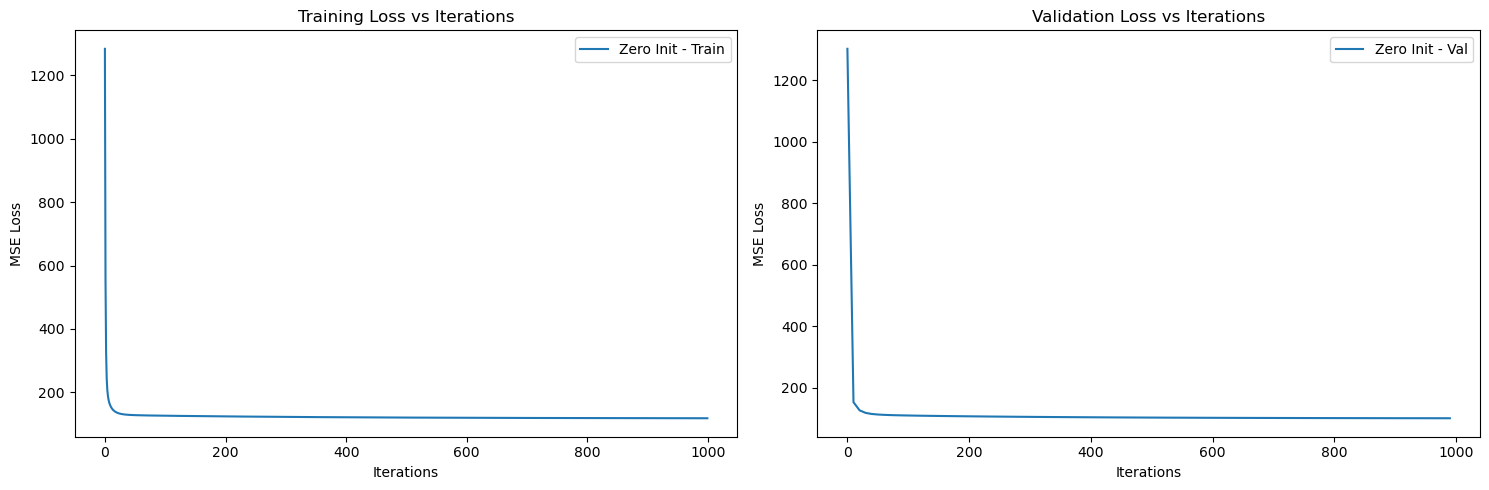


Zero Initialization Test Metrics:
MSE: 64.7104
R2 Score: 0.8441


In [24]:
# Train model with zero initialization
weights_zero, bias_zero, history_zero_train, history_zero_val = stochastic_gradient_descent(
    X_train, y_train, X_val, y_val, init_type='zero', learning_rate=0.0002, epochs=1000
)

# Plot training curves
plt.figure(figsize=(15, 5))

# Training loss plot
plt.subplot(1, 2, 1)
plt.plot(history_zero_train, label='Zero Init - Train')
plt.xlabel('Iterations')
plt.ylabel('MSE Loss')
plt.title('Training Loss vs Iterations')
plt.legend()

# Validation loss plot
plt.subplot(1, 2, 2)
plt.plot(range(0, len(history_zero_train), 10), history_zero_val, label='Zero Init - Val')
plt.xlabel('Iterations')
plt.ylabel('MSE Loss')
plt.title('Validation Loss vs Iterations')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate and compare test metrics
def evaluate_model(weights, bias, X_test, y_test):
    y_pred = np.dot(X_test, weights) + bias
    mse = mse_loss(y_test, y_pred)
    r2 = r2_score_manual(y_test, y_pred)
    return mse, r2

# Test metrics for zero initialization
mse_zero, r2_zero = evaluate_model(weights_zero, bias_zero, X_test, y_test)
print("\nZero Initialization Test Metrics:")
print(f"MSE: {mse_zero:.4f}")
print(f"R2 Score: {r2_zero:.4f}")


# Ridge Stochastic Descent

In [25]:
def ridge_stochastic_gradient_descent(X_train, y_train, X_val, y_val, lambda_, learning_rate=0.05, epochs=1000):
    weights = np.zeros(X_train.shape[1])
    bias = 0

    train_loss_history = []
    val_loss_history = []

    for epoch in range(epochs):
        for i in range(len(y_train)):
            xi = X_train[i, :].reshape(1, -1)
            yi = y_train[i]

            y_pred = np.dot(xi, weights) + bias

            dw = -2 * np.dot(xi.T, (yi - y_pred)) + 2 * lambda_ * weights
            db = -2 * (yi - y_pred)

            weights = weights - learning_rate * dw
            bias = bias - learning_rate * db

        y_train_pred = np.dot(X_train, weights) + bias
        train_loss = mse_loss(y_train, y_train_pred)
        train_loss_history.append(train_loss)

        if epoch % 10 == 0:
            y_val_pred = np.dot(X_val, weights) + bias
            val_loss = mse_loss(y_val, y_val_pred)
            val_loss_history.append(val_loss)

        if epoch % 50 == 0:
            print(f'Epoch {epoch}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    return weights, bias, train_loss_history, val_loss_history


Epoch 0, Train Loss: 1344.5368, Val Loss: 1361.0656
Epoch 50, Train Loss: 170.9604, Val Loss: 186.2877
Epoch 100, Train Loss: 169.9284, Val Loss: 184.9573
Epoch 150, Train Loss: 169.8811, Val Loss: 184.8927
Epoch 200, Train Loss: 169.8784, Val Loss: 184.8890
Epoch 250, Train Loss: 169.8783, Val Loss: 184.8887
Epoch 300, Train Loss: 169.8783, Val Loss: 184.8887
Epoch 350, Train Loss: 169.8783, Val Loss: 184.8887
Epoch 400, Train Loss: 169.8783, Val Loss: 184.8887
Epoch 450, Train Loss: 169.8783, Val Loss: 184.8887
Epoch 500, Train Loss: 169.8783, Val Loss: 184.8887
Epoch 550, Train Loss: 169.8783, Val Loss: 184.8887
Epoch 600, Train Loss: 169.8783, Val Loss: 184.8887
Epoch 650, Train Loss: 169.8783, Val Loss: 184.8887
Epoch 700, Train Loss: 169.8783, Val Loss: 184.8887
Epoch 750, Train Loss: 169.8783, Val Loss: 184.8887
Epoch 800, Train Loss: 169.8783, Val Loss: 184.8887
Epoch 850, Train Loss: 169.8783, Val Loss: 184.8887
Epoch 900, Train Loss: 169.8783, Val Loss: 184.8887
Epoch 950, Tr

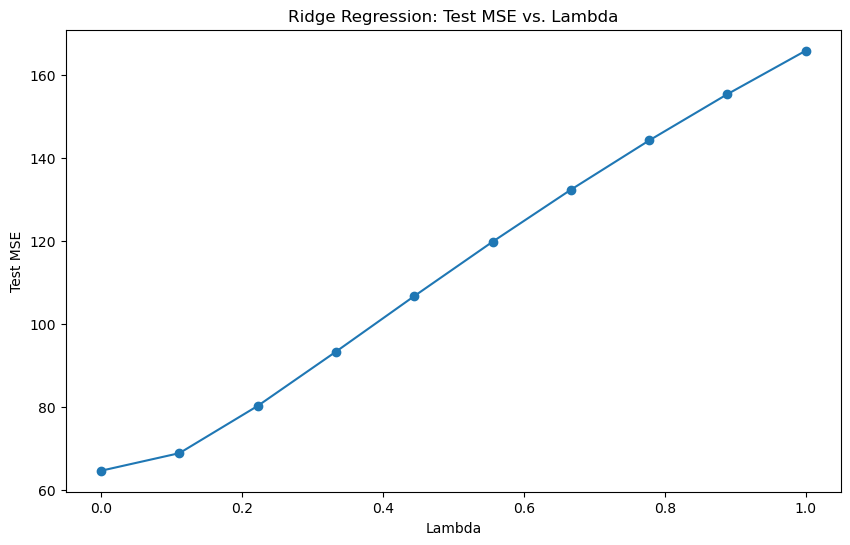

In [26]:

# Train model with lambda = 0.5
lambda_ = 0.5
weights_ridge, bias_ridge, history_ridge_train, history_ridge_val = ridge_stochastic_gradient_descent(
    X_train, y_train, X_val, y_val, lambda_=lambda_, learning_rate=0.0002, epochs=1000
)

# Evaluate on test set
mse_ridge, r2_ridge = evaluate_model(weights_ridge, bias_ridge, X_test, y_test)
print("\nRidge Regression Test Metrics:")
print(f"MSE: {mse_ridge:.4f}")
print(f"R2 Score: {r2_ridge:.4f}")

# Vary lambda and plot test MSE vs. lambda
lambdas = np.linspace(0, 1, 10)
test_mse_ridge = []

for lambda_ in lambdas:
    weights_ridge, bias_ridge, _, _ = ridge_stochastic_gradient_descent(
        X_train, y_train, X_val, y_val, lambda_=lambda_, learning_rate=0.0002, epochs=1000
    )
    mse_ridge, _ = evaluate_model(weights_ridge, bias_ridge, X_test, y_test)
    test_mse_ridge.append(mse_ridge)

plt.figure(figsize=(10, 6))
plt.plot(lambdas, test_mse_ridge, marker='o')
plt.xlabel('Lambda')
plt.ylabel('Test MSE')
plt.title('Ridge Regression: Test MSE vs. Lambda')
plt.show()

# Lasso Regularisation Stochastic Gradient Descent

In [27]:
def lasso_stochastic_gradient_descent(X_train, y_train, X_val, y_val, lambda_, learning_rate=0.05, epochs=1000):
    weights = np.zeros(X_train.shape[1])
    bias = 0

    train_loss_history = []
    val_loss_history = []

    for epoch in range(epochs):
        for i in range(len(y_train)):
            xi = X_train[i, :].reshape(1, -1)
            yi = y_train[i]

            y_pred = np.dot(xi, weights) + bias

            dw = -2 * np.dot(xi.T, (yi - y_pred)) + lambda_ * np.sign(weights)
            db = -2 * (yi - y_pred)

            weights = weights - learning_rate * dw
            bias = bias - learning_rate * db

        y_train_pred = np.dot(X_train, weights) + bias
        train_loss = mse_loss(y_train, y_train_pred)
        train_loss_history.append(train_loss)

        if epoch % 10 == 0:
            y_val_pred = np.dot(X_val, weights) + bias
            val_loss = mse_loss(y_val, y_val_pred)
            val_loss_history.append(val_loss)

        if epoch % 50 == 0:
            print(f'Epoch {epoch}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    return weights, bias, train_loss_history, val_loss_history


Epoch 0, Train Loss: 1298.6021, Val Loss: 1315.9016
Epoch 50, Train Loss: 126.5988, Val Loss: 114.2287
Epoch 100, Train Loss: 123.4953, Val Loss: 111.2213
Epoch 150, Train Loss: 123.4802, Val Loss: 110.4073
Epoch 200, Train Loss: 123.4406, Val Loss: 110.2876
Epoch 250, Train Loss: 123.4219, Val Loss: 110.2558
Epoch 300, Train Loss: 123.6572, Val Loss: 109.6212
Epoch 350, Train Loss: 123.4846, Val Loss: 108.9144
Epoch 400, Train Loss: 123.2447, Val Loss: 108.3109
Epoch 450, Train Loss: 123.1659, Val Loss: 108.0632
Epoch 500, Train Loss: 123.1207, Val Loss: 107.9298
Epoch 550, Train Loss: 123.0926, Val Loss: 107.8678
Epoch 600, Train Loss: 123.0805, Val Loss: 107.8380
Epoch 650, Train Loss: 123.0746, Val Loss: 107.8231
Epoch 700, Train Loss: 123.0718, Val Loss: 107.8152
Epoch 750, Train Loss: 123.0704, Val Loss: 107.8119
Epoch 800, Train Loss: 123.0697, Val Loss: 107.8100
Epoch 850, Train Loss: 123.0694, Val Loss: 107.8091
Epoch 900, Train Loss: 123.0693, Val Loss: 107.8086
Epoch 950, Tr

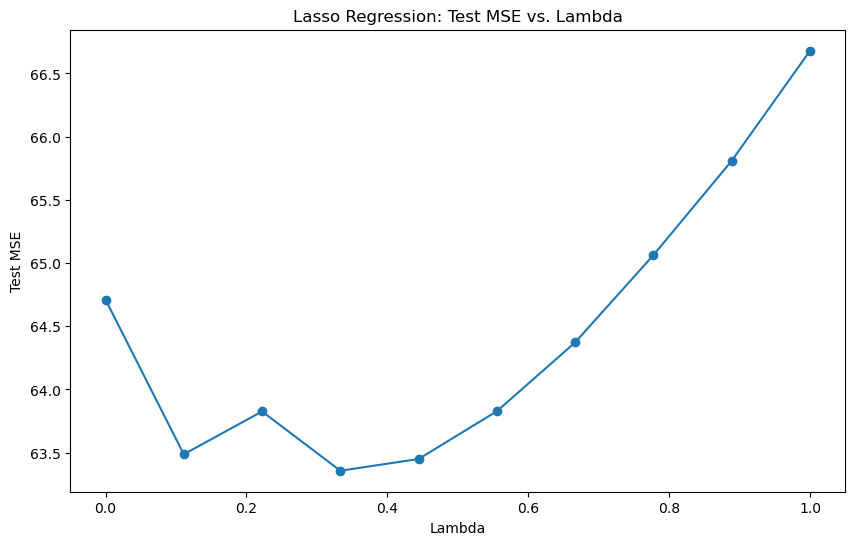

In [28]:

# Train model with lambda = 0.5
lambda_ = 0.5
weights_lasso, bias_lasso, history_lasso_train, history_lasso_val = lasso_stochastic_gradient_descent(
    X_train, y_train, X_val, y_val, lambda_=lambda_, learning_rate=0.0002, epochs=1000
)

# Evaluate on test set
mse_lasso, r2_lasso = evaluate_model(weights_lasso, bias_lasso, X_test, y_test)
print("\nLasso Regression Test Metrics:")
print(f"MSE: {mse_lasso:.4f}")
print(f"R2 Score: {r2_lasso:.4f}")

# Vary lambda and plot test MSE vs. lambda
lambdas = np.linspace(0, 1, 10)
test_mse_lasso = []

for lambda_ in lambdas:
    weights_lasso, bias_lasso, _, _ = lasso_stochastic_gradient_descent(
        X_train, y_train, X_val, y_val, lambda_=lambda_, learning_rate=0.0002, epochs=1000
    )
    mse_lasso, _ = evaluate_model(weights_lasso, bias_lasso, X_test, y_test)
    test_mse_lasso.append(mse_lasso)

plt.figure(figsize=(10, 6))
plt.plot(lambdas, test_mse_lasso, marker='o')
plt.xlabel('Lambda')
plt.ylabel('Test MSE')
plt.title('Lasso Regression: Test MSE vs. Lambda')
plt.show()